In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
from load_data import load_data
import matplotlib.pyplot as plt



In [2]:
data_dir = r"E:\CHANDU\Projects\ComputerVisionProjects\SignLangDetect\dataset\train"
images,labels,label_maps = load_data(data_dir)

Loading data....
Done...


(32, 32, 3)


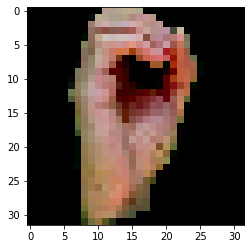

In [3]:

plt.imshow(images[0])
print(images[1].shape)

In [4]:
X_train_org,X_val_org,y_train_org,y_val_org = train_test_split(images,labels,test_size=0.15,random_state=42)

In [5]:
X_train_org.shape

(1802, 32, 32, 3)

In [6]:
X_val_org.shape

(319, 32, 32, 3)

In [7]:
y_val_org

array([31, 25,  4, 27, 31, 22, 15, 28,  8, 31, 24, 30, 13, 35, 17,  1,  3,
        4, 18, 27, 31,  6, 24, 19, 12, 23,  5, 11,  8, 31, 28, 19,  9, 26,
       16,  9, 34,  7, 16, 17, 16,  1, 19,  1, 24, 10, 25, 14,  7, 19, 32,
        6,  4,  7, 22,  5, 12, 30, 21,  7, 21, 16, 18, 15,  0,  5, 25, 34,
       31, 27, 17,  5,  6, 12, 18, 22,  0,  3,  7, 33,  8, 30, 29, 24, 31,
       23, 29, 17, 11, 11, 32,  6, 29,  6, 24,  1,  4, 23,  6, 11,  6, 21,
       28, 28, 27, 18,  4,  4, 11,  9,  9,  9,  5, 24, 32, 16,  2, 33,  9,
       27, 10,  5, 18,  1, 33, 24, 33,  2, 24, 33,  8,  0, 20,  8, 21, 24,
       28,  3, 15, 11, 35, 29, 15,  9, 19, 24, 18, 32, 26, 31, 28, 21, 22,
       10, 25, 22,  1, 34,  9, 10, 21,  3, 29,  9, 25, 30, 25, 15, 32, 14,
        4, 23, 13,  7,  4, 16, 34,  6, 29, 27, 22, 32, 32, 10,  2, 30,  8,
       28, 21,  7, 15, 29,  1, 17,  5, 17, 30,  3,  5, 19, 12, 33, 33, 34,
       19, 10,  9,  4,  5, 15, 24,  8, 32,  3, 28, 35, 18, 34,  1, 34,  8,
       30, 33,  3, 26, 26

# Model

In [8]:
from tensorflow.keras import models,layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns

In [9]:
X_train = X_train_org/255
X_val = X_val_org/255

In [10]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),  # Dropout layer with 50% dropout rate
    layers.Dense(36, activation='softmax')
])

c:\ProgramData\Anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
cnn.compile(optimizer ='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [13]:
cnn.fit(X_train,y_train_org, epochs = 10)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9396 - loss: 0.1580
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9536 - loss: 0.1237
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9448 - loss: 0.1222
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9691 - loss: 0.0825
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9637 - loss: 0.0867
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9605 - loss: 0.1123
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9809 - loss: 0.0582
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9798 - loss: 0.0788
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9764 - loss: 0.0531
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9791 - loss: 0.0628


In [15]:
predict_val=cnn.predict(X_val)
predict_val_classes = np.argmax(predict_val,axis=1)
print("Predict_val_classes: ",predict_val_classes)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predict_val_classes:  [31 25  4 27 31 22 15 28  8 31 24 30 13 35 17  1  3  4 18 27 31  6 24 19
 12 23  5 11  8 31 28 19  9 26 16  9 34  7 16 17 16 35 19  1 24 10 25 14
  7 19 32 32  4  7 22  5 12 30 21  7 21 16 18 15  0  5 25 34 31 27 17  5
 32 12 18 22  0 35  7 33  8 30 29 24 31 23 29 17 11 11 32  6 29  6  0  1
  4 23 32 11 32 21 28 28 30 18  4  4 11  9  9  9  5  0 31 16 31 33  9 27
 10  5 18  1 33  0 33 31 24 33  8  0 20  8 21 24 28  3 15 11 35 29 15  9
 19 24 18 32 26 31 28 21 22 10 25 22  1 34  9 10 21  3 29  9 25 30 25 15
 32 14  4 23 18  7  4 16 34  6 29 30 23 32 31 10 31 30  8 10 21  7 15 29
  1 17  5 17 30  3  5 19 12 33 33 34 19 10  9  4  5 15 24  8 32  3 28 35
 18 34  1 34  8 30 33  3 26 26 30 16 13 22 19 14  9 28  3 14 17 18 11 20
 19 20 26 31  3  2 28  1  4 12  7  4 32 20 32 34  9 14 27  0 23 16 33 27
 35  6 35 31 30 24 28 18 30 23 24 31 18 23 32 21 16  2  5 18 30 14 35 11
 35 25 29 10 18 31 33 17 10 35 33 29 23 32 29 25 12 14 29  7  

In [14]:
cnn.evaluate(X_val,y_val_org)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9323 - loss: 0.1622


[0.16941876709461212, 0.9278996586799622]

In [ ]:
test_dir = r"E:\CHANDU\Projects\ComputerVisionProjects\SignLangDetect\dataset\test"
test_datagen = ImageDataGenerator(rescale=1/255)

# Load and preprocess the testing data
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(32,32),
                                                  batch_size=32,
                                                  class_mode='categorical',  # Use 'binary' for binary classification
                                                  shuffle=True)




In [17]:
test_dir = r"E:\CHANDU\Projects\ComputerVisionProjects\SignLangDetect\dataset\test"

X_test,y_test,test_labels = load_data(test_dir)

Loading data....
Done...


In [18]:
X_test=X_test/255

In [19]:
predictions_test = cnn.predict(X_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [20]:
cnn.evaluate(X_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9243 - loss: 0.1906


[0.11154438555240631, 0.9569620490074158]

In [21]:
predict_test_classes = np.argmax(predictions_test,axis=1)
print("Predicted classes: ",predict_test_classes)

Predicted classes:  [ 0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  2 31
  2  2  2 31 31 31 31 31  2  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4
  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  6  6 32  6 32 32
 32 32  6 32  6  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8 15  8
  8  8  8  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10
 10 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 13
 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 14 15 15 15
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17
 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19
 19 19 19 19 20 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21
 21 21 22 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23 23
 24  0  0 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 25 26 26
 26 26 26 26 26 26 26 26 26 27 27 27 27 27 27 35 27 27 27 30 28 28 28 28
 28 28 28 28 28 28 28 29 29 29 

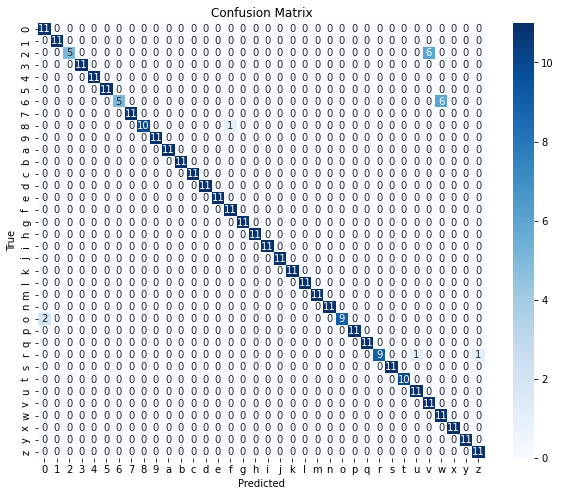

In [22]:
# True labels
true_classes = y_test
# Class labels
class_labels = list(test_labels.values())

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predict_test_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [29]:
print(accuracy_score(predict_test_classes,y_test))

0.9569620253164557


In [ ]:
cnn.save("model.keras")